# Análise exploratória dos microdados do ENEM (de 2009 a 2021)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [33]:
# carregando o dataset
enem_df = pd.read_csv('enem2009_2021.csv')
enem_df.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,2009,5,F,NaN,NaN,NaN,459.6,410.4,536.6,556.9,575.0,1.0
1,2009,4,M,TANGUA,RJ,2.0,409.2,323.1,376.7,360.5,475.0,0.0
2,2009,9,F,NaN,NaN,NaN,406.9,430.3,519.9,413.1,500.0,3.0
3,2009,7,F,NaN,NaN,NaN,432.3,527.7,541.2,464.4,700.0,3.0
4,2009,3,F,RIO BONITO,RJ,3.0,406.1,629.9,580.0,417.9,775.0,2.0


# Visualizando os Dados

In [3]:
# visualizando os dados
display(enem_df)

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,2009,5,F,NaN,NaN,NaN,459.6,410.4,536.6,556.9,575.0,1.0
1,2009,4,M,TANGUA,RJ,2.0,409.2,323.1,376.7,360.5,475.0,0.0
2,2009,9,F,NaN,NaN,NaN,406.9,430.3,519.9,413.1,500.0,3.0
3,2009,7,F,NaN,NaN,NaN,432.3,527.7,541.2,464.4,700.0,3.0
4,2009,3,F,RIO BONITO,RJ,3.0,406.1,629.9,580.0,417.9,775.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52685383,2021,15,F,NaN,NaN,NaN,506.0,405.2,416.3,450.4,240.0,1.0
52685384,2021,14,M,NaN,NaN,NaN,435.6,531.2,534.7,399.2,320.0,3.0
52685385,2021,10,M,NaN,NaN,NaN,576.9,605.6,631.0,678.0,640.0,1.0
52685386,2021,5,F,NaN,NaN,NaN,449.9,368.2,466.3,370.0,540.0,3.0


In [4]:
# visualizando os tipos dos dados
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52685388 entries, 0 to 52685387
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_ANO                  int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   NO_MUNICIPIO_ESC        object 
 4   SG_UF_ESC               object 
 5   TP_DEPENDENCIA_ADM_ESC  float64
 6   NU_NOTA_CN              float64
 7   NU_NOTA_CH              float64
 8   NU_NOTA_LC              float64
 9   NU_NOTA_MT              float64
 10  NU_NOTA_REDACAO         float64
 11  TP_COR_RACA             float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.7+ GB


In [5]:
# verificando a existência de valores nulos
enem_df.isnull().sum()

NU_ANO                           0
TP_FAIXA_ETARIA                  0
TP_SEXO                        536
NO_MUNICIPIO_ESC          37928692
SG_UF_ESC                 37928692
TP_DEPENDENCIA_ADM_ESC    37928692
NU_NOTA_CN                       0
NU_NOTA_CH                       0
NU_NOTA_LC                       0
NU_NOTA_MT                       0
NU_NOTA_REDACAO                  0
TP_COR_RACA                      0
dtype: int64

In [6]:
# analisando informações estatísticas
enem_df.describe().round(1)

,NU_ANO,TP_FAIXA_ETARIA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
count,52685388.0,52685388.0,14756696.0,52685388.0,52685388.0,52685388.0,52685388.0,52685388.0,52685388.0
mean,2014.9,5.5,2.4,484.1,530.8,511.3,504.3,533.7,2.1
std,3.2,4.0,0.9,77.6,84.8,73.9,110.5,175.7,1.0
min,2009.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2012.0,2.0,2.0,426.0,470.9,463.1,419.0,440.0,1.0
50%,2015.0,4.0,2.0,475.8,535.0,515.7,486.4,540.0,2.0
75%,2017.0,8.0,2.0,535.2,591.6,562.9,575.2,640.0,3.0
max,2021.0,20.0,4.0,903.2,888.7,835.6,1008.3,1000.0,5.0


In [7]:
# média (valor médio)
enem_df['NU_NOTA_MT'].mean()

504.28959866842143

In [8]:
# mediana (número do meio)
enem_df['NU_NOTA_MT'].median()

486.4

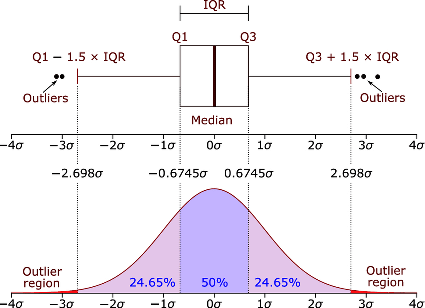

In [9]:
# camparação de de box plot com distribuição normal
box_plot = Image.open('imagens/box_plot_e_distribuicao_normal.png')

width, height = box_plot.size

box_plot = box_plot.resize((width//2, height//2))
box_plot

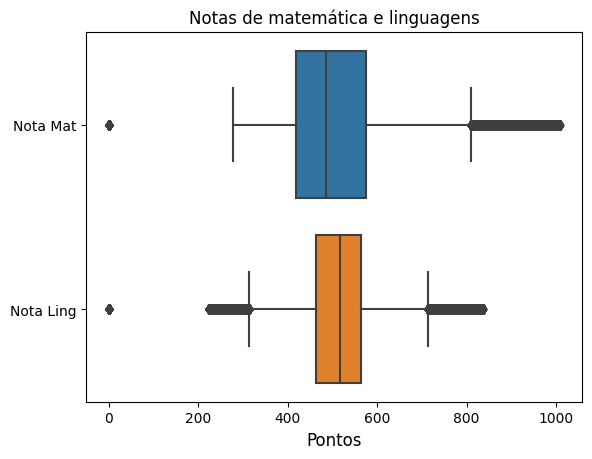

In [10]:
# box plot das notas de matemática e linguagens ao longo dos anos
sns.boxplot(data=enem_df[['NU_NOTA_MT', 'NU_NOTA_LC']], orient="h")
plt.yticks([0, 1], ['Nota Mat', 'Nota Ling'])
plt.title('Notas de matemática e linguagens')
plt.xlabel("Pontos", size=12)
plt.show()

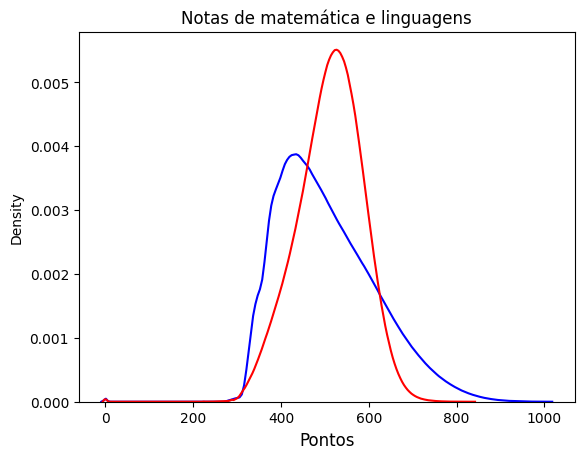

In [11]:
# notas de mátematica e linguagens por ano (gráfico de densidade)
sns.kdeplot(enem_df['NU_NOTA_MT'], color="blue", label='matemática')
sns.kdeplot(enem_df['NU_NOTA_LC'], color="red", label='linguagens')
plt.title('Notas de matemática e linguagens')
plt.xlabel("Pontos", size=12);

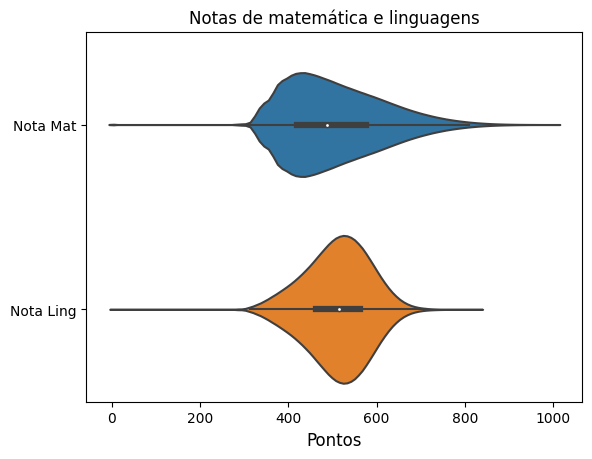

In [12]:
# notas de mátematica e linguagens por ano (gráfico de violino)
sns.violinplot(data=enem_df[['NU_NOTA_MT', 'NU_NOTA_LC']], orient="h")
plt.yticks([0, 1], ['Nota Mat', 'Nota Ling'])
plt.title('Notas de matemática e linguagens')
plt.xlabel("Pontos", size=12)
plt.show()

# Transformando os Dados

## Faixa Etária

In [34]:
# Tranformando os dados da variável TP_FAIXA_ETARIA
'''enem_df['TP_FAIXA_ETARIA'] = enem_df['TP_FAIXA_ETARIA'].map(
    {
        1:'Menor de 17 anos',
        2:'17 anos',
        3:'18 anos',
        4:'19 anos',
        5:'20 anos',
        6:'21 anos',
        7:'22 anos',
        8:'23 anos',
        9:'24 anos',
        10:'25 anos',
        11:'Entre 26 e 30 anos',
        12:'Entre 31 e 35 anos',
        13:'Entre 36 e 40 anos',
        14:'Entre 41 e 45 anos',
        15:'Entre 46 e 50 anos',
        16:'Entre 51 e 55 anos',
        17:'Entre 56 e 60 anos',
        18:'Entre 61 e 65 anos',
        19:'Entre 66 e 70 anos',
        20:'Maior de 70 anos'
    }
)'''


"enem_df['TP_FAIXA_ETARIA'] = enem_df['TP_FAIXA_ETARIA'].map(\n    {\n        1:'Menor de 17 anos',\n        2:'17 anos',\n        3:'18 anos',\n        4:'19 anos',\n        5:'20 anos',\n        6:'21 anos',\n        7:'22 anos',\n        8:'23 anos',\n        9:'24 anos',\n        10:'25 anos',\n        11:'Entre 26 e 30 anos',\n        12:'Entre 31 e 35 anos',\n        13:'Entre 36 e 40 anos',\n        14:'Entre 41 e 45 anos',\n        15:'Entre 46 e 50 anos',\n        16:'Entre 51 e 55 anos',\n        17:'Entre 56 e 60 anos',\n        18:'Entre 61 e 65 anos',\n        19:'Entre 66 e 70 anos',\n        20:'Maior de 70 anos'\n    }\n)"

In [35]:
enem_df['TP_FAIXA_ETARIA'].value_counts()

TP_FAIXA_ETARIA
2     9343286
3     8825989
4     5787749
1     4810022
11    4184617
5     3996642
6     2925404
12    2370148
7     2263122
8     1821354
13    1510383
9     1504370
10    1262224
14     960486
15     602257
16     316959
17     136769
18      45030
19      13647
20       4930
Name: count, dtype: int64

### Tipo de Ensino

In [36]:
enem_df['TP_DEPENDENCIA_ADM_ESC'].value_counts()

TP_DEPENDENCIA_ADM_ESC
2.0    10917609
4.0     3261544
1.0      423466
3.0      154077
Name: count, dtype: int64

In [37]:
# Tranformando os dados da variável TP_ENSINO
enem_df['TP_DEPENDENCIA_ADM_ESC'] = enem_df['TP_DEPENDENCIA_ADM_ESC'].map(
    {
        1:'Federal', 
        2:'Estadual', 
        3:'Municipal', 
        4:'Privada'
    }
)

In [38]:
enem_df['TP_DEPENDENCIA_ADM_ESC'].value_counts()

TP_DEPENDENCIA_ADM_ESC
Estadual     10917609
Privada       3261544
Federal        423466
Municipal      154077
Name: count, dtype: int64

### Cor/Raça

In [39]:
enem_df['TP_COR_RACA'].value_counts()

TP_COR_RACA
3.0    22859270
1.0    20634749
2.0     6361553
0.0     1314925
4.0     1206545
5.0      308346
Name: count, dtype: int64

In [40]:
# Tranformando os dados da variável TP_COR_RACA
enem_df['TP_COR_RACA'] = enem_df['TP_COR_RACA'].map(
    {
        0.0:'NA',
        1.0:'Branca', 
        2.0:'Preta', 
        3.0:'Parda', 
        4.0:'Amarela', 
        5.0:'Indigena'
    }
)

In [41]:
enem_df['TP_COR_RACA'].value_counts()

TP_COR_RACA
Parda       22859270
Branca      20634749
Preta        6361553
NA           1314925
Amarela      1206545
Indigena      308346
Name: count, dtype: int64

In [42]:
# observando os tipos dos dados transformados
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52685388 entries, 0 to 52685387
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_ANO                  int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   NO_MUNICIPIO_ESC        object 
 4   SG_UF_ESC               object 
 5   TP_DEPENDENCIA_ADM_ESC  object 
 6   NU_NOTA_CN              float64
 7   NU_NOTA_CH              float64
 8   NU_NOTA_LC              float64
 9   NU_NOTA_MT              float64
 10  NU_NOTA_REDACAO         float64
 11  TP_COR_RACA             object 
dtypes: float64(5), int64(2), object(5)
memory usage: 4.7+ GB


In [43]:
# informações estatísticas depois das transformações
enem_df.describe().round(1)

,NU_ANO,TP_FAIXA_ETARIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,52685388.0,52685388.0,52685388.0,52685388.0,52685388.0,52685388.0,52685388.0
mean,2014.9,5.5,484.1,530.8,511.3,504.3,533.7
std,3.2,4.0,77.6,84.8,73.9,110.5,175.7
min,2009.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,2012.0,2.0,426.0,470.9,463.1,419.0,440.0
50%,2015.0,4.0,475.8,535.0,515.7,486.4,540.0
75%,2017.0,8.0,535.2,591.6,562.9,575.2,640.0
max,2021.0,20.0,903.2,888.7,835.6,1008.3,1000.0


# Análise por Gráfico

## Inscriçãos por ano

In [44]:
# total de inscrições por ano
enem_df['NU_ANO'].value_counts()

NU_ANO
2014    5947914
2016    5818264
2015    5604905
2013    5007934
2017    4426692
2012    3943244
2018    3893729
2011    3853313
2019    3701909
2010    3234222
2020    2588681
2009    2426474
2021    2238107
Name: count, dtype: int64

In [45]:
# média de inscrições
enem_df['NU_ANO'].value_counts().mean().round(1)

4052722.2

In [46]:
enem_df['NU_ANO'].value_counts().sum().round(1)

52685388

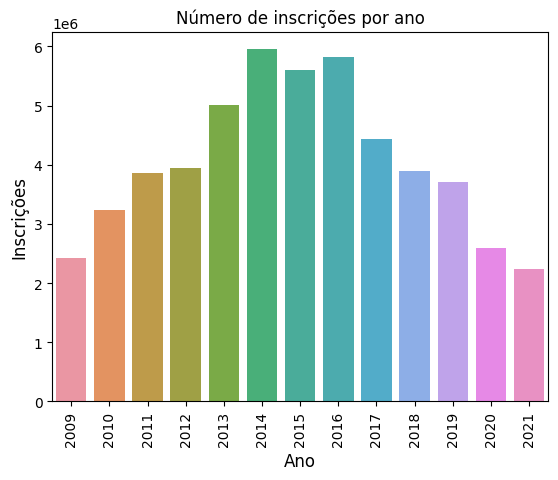

In [47]:
# número de inscrições por ano (gráfico de barras)
sns.countplot(x=enem_df['NU_ANO'])
plt.title('Número de inscrições por ano')
plt.xticks(rotation=90)
plt.xlabel('Ano', size=12)
plt.ylabel('Inscrições', size=12)
plt.show()

## Inscrições, cor/raça por ano

In [48]:
# inscrições por ano por etnia
enem_df.groupby(["NU_ANO", "TP_COR_RACA"])["TP_COR_RACA"].count()

NU_ANO  TP_COR_RACA
2009    Amarela         71380
        Branca         907838
        Indigena        16144
        NA             340183
        Parda          843907
                        ...  
2021    Branca         979456
        Indigena        10540
        NA              43735
        Parda          912861
        Preta          246568
Name: TP_COR_RACA, Length: 78, dtype: int64

In [49]:
# número de inscrições de por ano por etnia (pivot table)
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_COR_RACA', 
    aggfunc='count'
    )

TP_COR_RACA,Amarela,Branca,Indigena,NA,Parda,Preta
NU_ANO,,,,,,
2009,71380,907838,16144,340183,843907,247022
2010,71218,1433284,20590,104761,1243401,360968
2011,89735,1655496,23476,96011,1538405,450190
2012,91975,1710874,22690,69447,1596754,451504
2013,113680,2023255,31284,82560,2156946,600209
2014,130120,2297237,35848,90667,2658254,735788
2015,125209,2103579,30388,99019,2533490,713220
2016,136274,2104339,33723,104629,2684885,754414
2017,102304,1619075,25815,82509,2039229,557760


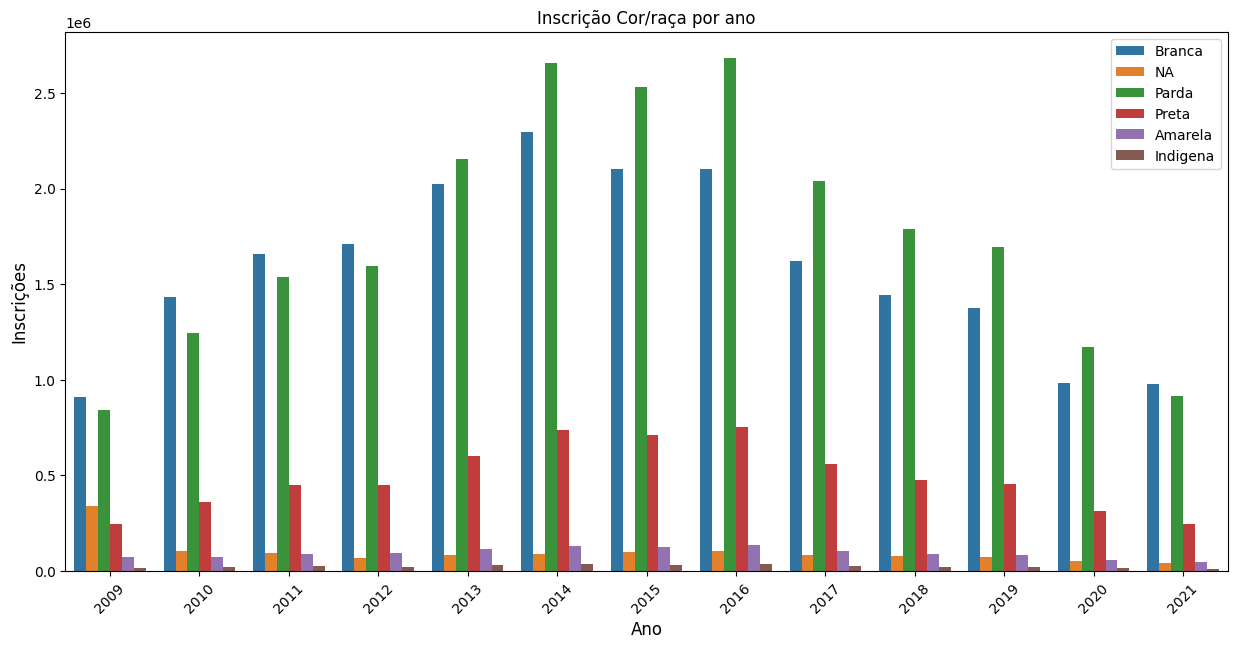

In [50]:
# número de inscrições de por ano por etnia
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(x=enem_df['NU_ANO'], hue=enem_df['TP_COR_RACA'], dodge=True)
plt.title('Inscrição Cor/raça por ano')
plt.xticks(rotation=45)
plt.xlabel('Ano', size=12)
plt.ylabel('Inscrições', size=12)
plt.legend(loc='best')
plt.show()

## Inscrições, sexo por ano

In [51]:
# inscrições por ano por sexo
enem_df.groupby(["NU_ANO", "TP_SEXO"])["TP_SEXO"].count()

NU_ANO  TP_SEXO
2009    F          1465779
        M           960159
2010    F          1930181
        M          1304041
2011    F          2287726
        M          1565587
2012    F          2315814
        M          1627430
2013    F          2918185
        M          2089749
2014    F          3444943
        M          2502971
2015    F          3233582
        M          2371323
2016    F          3372979
        M          2445285
2017    F          2590982
        M          1835710
2018    F          2301518
        M          1592211
2019    F          2201154
        M          1500755
2020    F          1564051
        M          1024630
2021    F          1381949
        M           856158
Name: TP_SEXO, dtype: int64

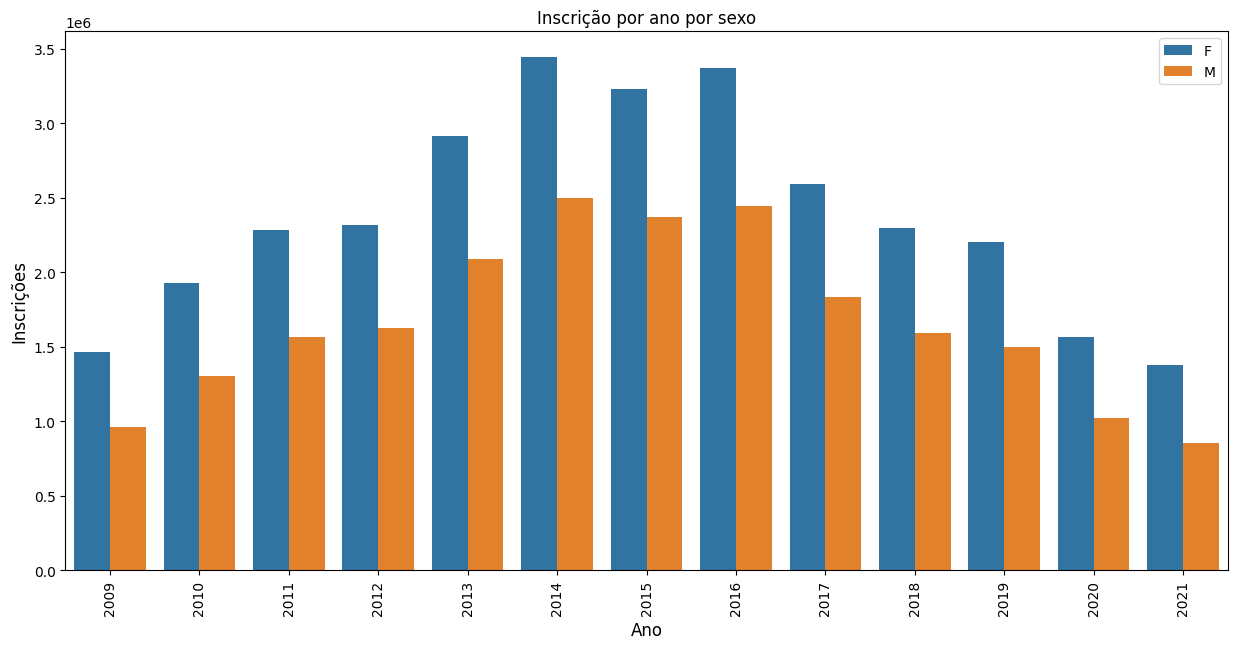

In [52]:
# número de inscrições por ano por sexo
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(x = enem_df['NU_ANO'], hue=enem_df['TP_SEXO'], dodge=True)
plt.title('Inscrição por ano por sexo')
plt.xticks(rotation=90)
plt.xlabel('Ano', size=12)
plt.ylabel('Inscrições', size=12)
plt.legend(loc='best')
plt.show()

## Inscrições por ano por estado

In [53]:
# inscrições anuais por estado
enem_df.groupby(["NU_ANO", "SG_UF_ESC"])["SG_UF_ESC"].count()

NU_ANO  SG_UF_ESC
2009    AC             3138
        AL            10655
        AM            22645
        AP             2985
        BA            74237
                      ...  
2021    RS            28061
        SC            19879
        SE             6764
        SP           113008
        TO             4494
Name: SG_UF_ESC, Length: 351, dtype: int64

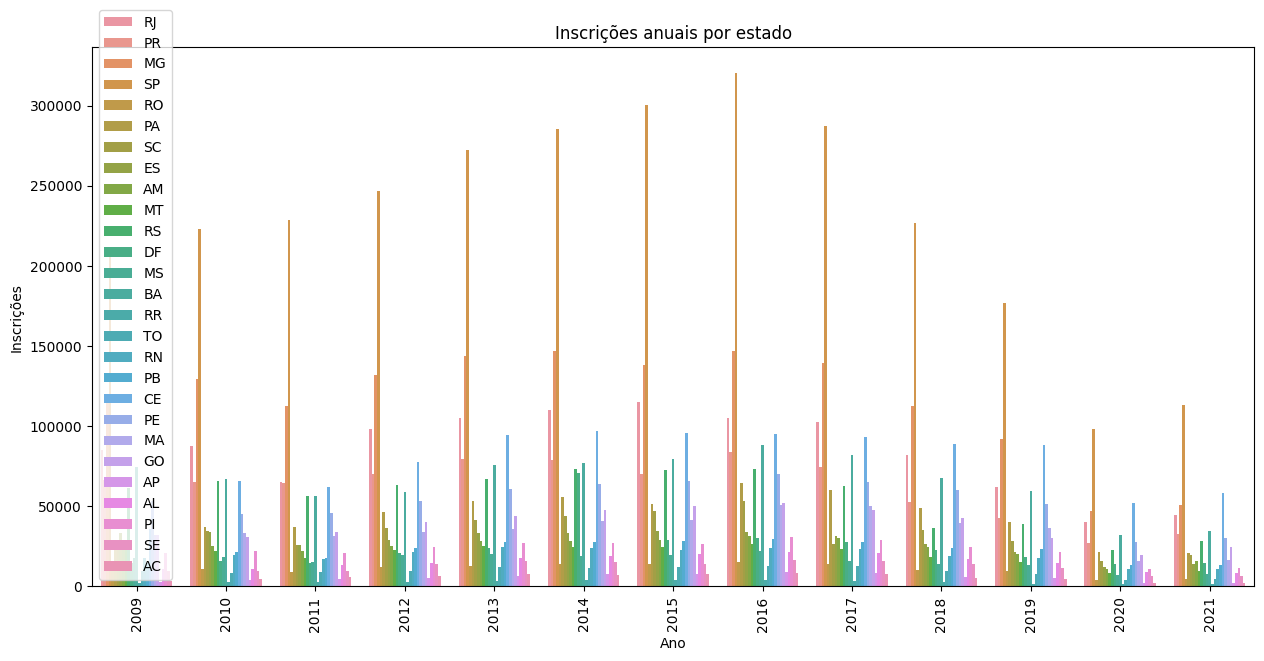

In [54]:
# gerando gráfico do número de inscrições anuais por estado
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(x = enem_df['NU_ANO'], hue=enem_df['SG_UF_ESC'], dodge=True)
plt.title('Inscrições anuais por estado')
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Inscrições')
plt.legend(loc='best')
plt.show()

In [55]:
# número de inscrições por ano por estado (pivot table)
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='SG_UF_ESC', 
    aggfunc='count'
    )

SG_UF_ESC,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
NU_ANO,,,,,,,,,,,,,,,,,,,,,
2009,3138,10655,22645,2985,74237,35949,14649,33217,32411,31943,...,66652,85409,17618,10226,2072,61509,28773,9912,207744,9534
2010,4355,10785,25041,3949,67253,65765,16166,34276,30920,33651,...,65272,87506,19661,11083,2929,65548,34700,9882,222948,8240
2011,5797,13362,22172,4455,56486,62227,14402,25836,33834,31253,...,64394,64898,17034,8994,2670,56300,26133,9352,228511,9239
2012,6772,14950,25164,5092,59115,77559,20922,29143,40145,33934,...,70359,97952,21529,12033,2828,63227,36322,14140,246925,9621
2013,7910,17853,28188,6828,75666,94302,23700,33492,44022,35961,...,79411,105326,24903,12628,3243,66820,41675,15979,272102,11898
2014,7384,18878,28621,7787,77284,97090,70715,33386,47582,40608,...,79157,109903,24017,14009,3765,73235,44082,15034,285543,11693
2015,7781,20032,28995,8045,79356,95742,29144,34666,50205,41264,...,70093,115148,22843,14174,3825,72794,46944,14092,300355,12403
2016,8375,21591,31559,9229,88163,95066,30222,33718,52255,50683,...,83710,104920,24191,15226,3964,73099,53249,16759,320280,12906
2017,8039,20643,30086,8629,81960,93144,27470,31590,47899,50495,...,74736,102748,23297,13883,3661,62649,26394,16011,287529,13036


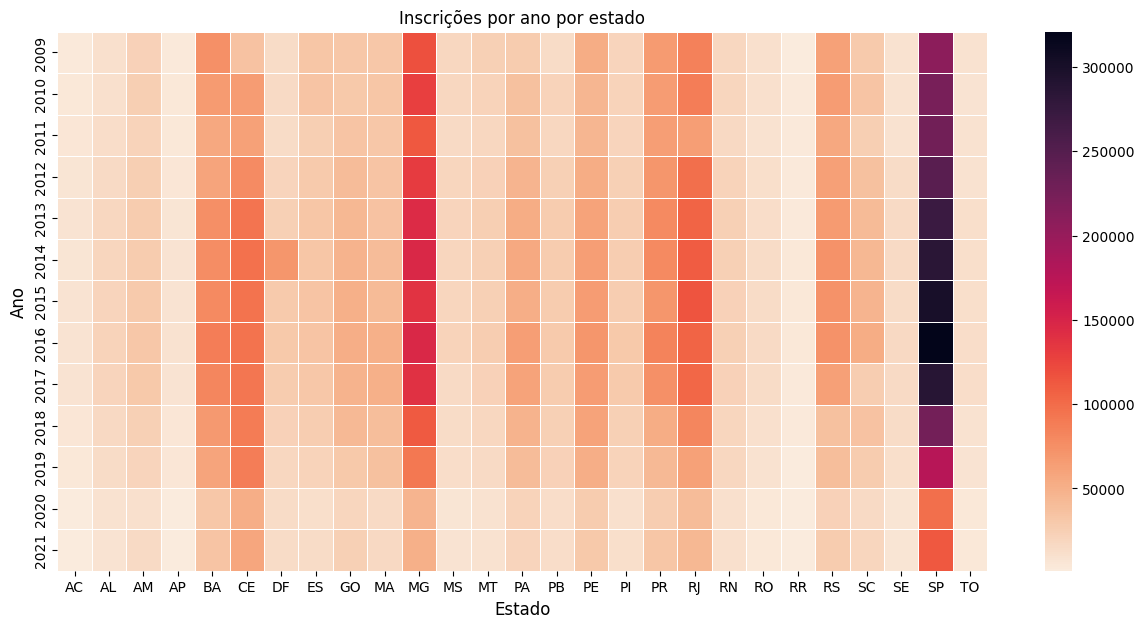

In [56]:
# número de inscrições por ano por estado (heart map)
data= pd.pivot_table(
    enem_df, 
    values='NU_NOTA_MT', 
    index='NU_ANO', 
    columns='SG_UF_ESC', 
    aggfunc='count'
    )

f, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(
    data, 
    cmap="rocket_r", 
    annot=False, 
    fmt="d", 
    linewidths=.5, 
    ax=ax, 
    vmin=1200, 
    vmax=321000
    )

plt.title('Inscrições por ano por estado')
plt.xlabel("Estado",size=12)
plt.ylabel("Ano", size=12);

## Inscrições por ano por faixa etária

In [57]:
# número de inscrições por ano por faixa etária (pivot table)
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='count'
    )

TP_FAIXA_ETARIA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NU_ANO,,,,,,,,,,,,,,,,,,,,
2009,18450,103684,458054,422503,258773,186628,140265,111097,92178,77252,251794,126598,76997,48988,29912,14770,6026,1768,510,227
2010,168072,590787,517896,338272,235331,184558,149795,124184,106774,91006,309919,167437,105814,69708,42615,20644,8208,2305,647,250
2011,284282,708301,609203,392433,280381,205375,171290,144155,120679,105324,358534,194505,119301,76068,47445,23125,9264,2594,759,295
2012,355692,745801,636656,409696,282039,209734,161027,137955,116427,98093,332647,184496,114893,74636,47160,23115,9357,2792,767,261
2013,541291,886075,758880,507031,359962,265208,209527,168275,147725,127394,427384,246721,151571,98830,62633,30982,12976,3925,1134,410
2014,695380,994058,851207,585031,426389,323184,250560,206396,169142,150708,517848,310640,194065,125985,80803,41622,17414,5428,1524,530
2015,606790,935504,859238,585022,426071,318457,248681,197293,164272,134219,466651,265709,166071,106331,66517,35912,15272,4927,1438,530
2016,646891,1021578,881146,621305,446447,335169,259434,206914,164965,137818,451327,257744,163670,102614,63874,35083,15031,5189,1547,518
2017,347275,824831,768328,487343,354929,257013,198898,155499,126155,101826,332875,191364,121499,72861,44753,24750,10945,3902,1206,440


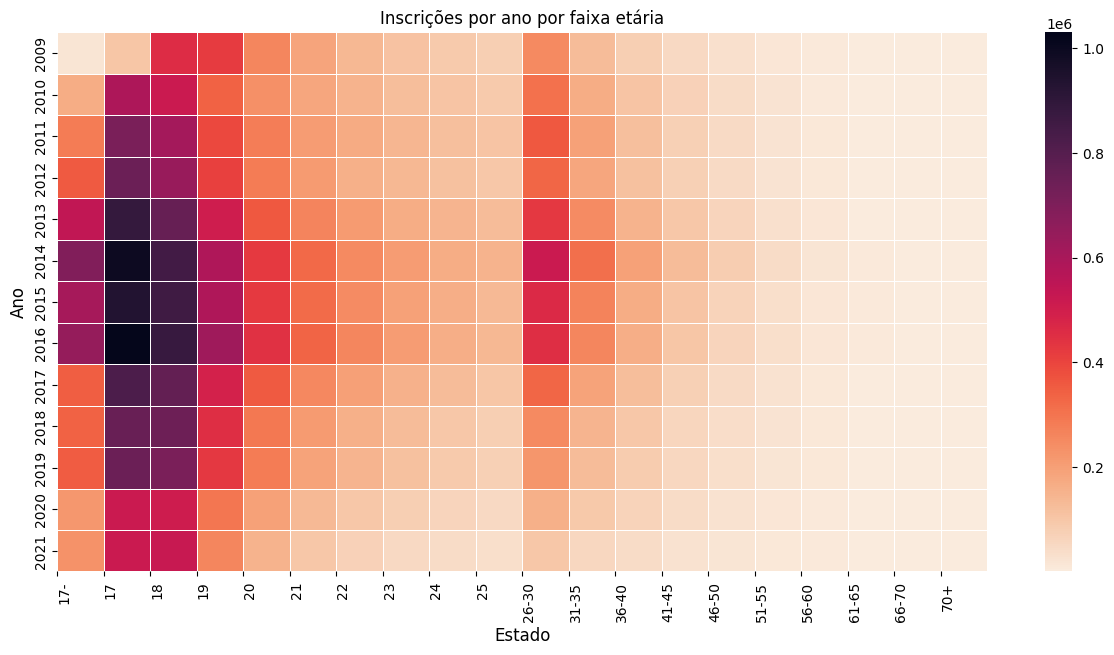

In [58]:
# número de inscrições por ano por faixa etária (heart map)
data= pd.pivot_table(
    enem_df, 
    values='NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='count'
    )

f, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(
    data, 
    cmap="rocket_r", 
    annot=False, 
    fmt="d", 
    linewidths=.5, 
    ax=ax, 
    vmin=200, 
    vmax=1030000
    )

plt.xticks(
    np.arange(0, 20, 1), 
    [
        '17-', 
        '17', 
        '18', 
        '19', 
        '20', 
        '21', 
        '22', 
        '23',
        '24', 
        '25', 
        '26-30', 
        '31-35', 
        '36-40', 
        '41-45', 
        '46-50', 
        '51-55', 
        '56-60', 
        '61-65', 
        '66-70', 
        '70+'
    ], rotation=90, ha='left')

plt.title('Inscrições por ano por faixa etária')
plt.xlabel("Estado", size=12)
plt.ylabel("Ano", size=12);

# Notas de matemática por ano

### Notas de matemática e linguagens

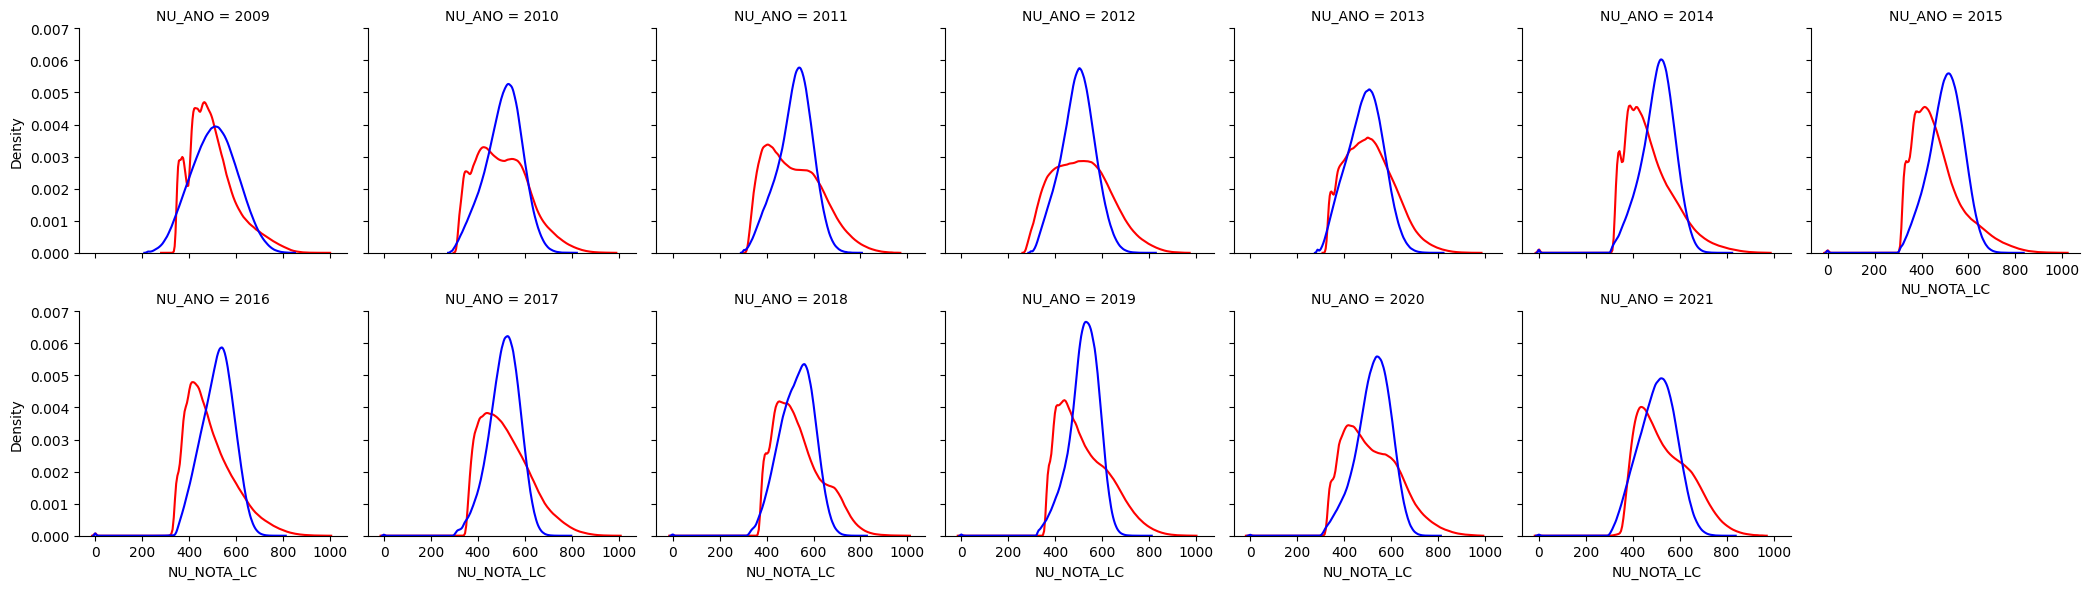

In [59]:
# notas de mátematica e linguagens por ano (gráfico de densidade)
g = sns.FacetGrid(enem_df, col="NU_ANO", col_wrap=7)
g.map(sns.kdeplot, "NU_NOTA_MT", color="red", label='matemática')
g.map(sns.kdeplot, "NU_NOTA_LC", color="blue", label='linguagens');

In [60]:
# criando o dataframe com as variáveis ano, nota de matemática e nota de linguagens
nota_mtlg = enem_df[['NU_ANO', 'NU_NOTA_MT', 'NU_NOTA_LC']]
nota_mtlg

,NU_ANO,NU_NOTA_MT,NU_NOTA_LC
0,2009,556.9,536.6
1,2009,360.5,376.7
2,2009,413.1,519.9
3,2009,464.4,541.2
4,2009,417.9,580.0
...,...,...,...
52685383,2021,450.4,416.3
52685384,2021,399.2,534.7
52685385,2021,678.0,631.0
52685386,2021,370.0,466.3


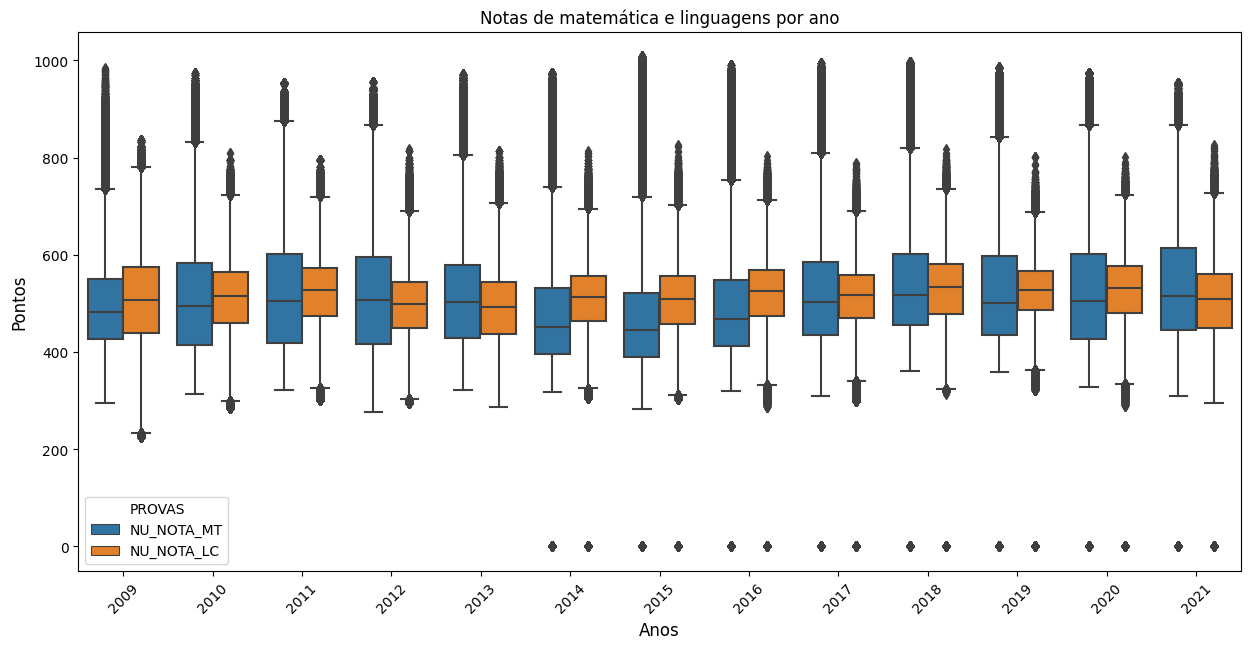

In [61]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(
    x='NU_ANO', 
    y='value', 
    hue='variable', 
    data=nota_mtlg.melt(
        id_vars='NU_ANO', 
        var_name='variable', 
        value_name='value'
        )
    )

plt.title('Notas de matemática e linguagens por ano')
plt.xticks(rotation=45)
plt.xlabel("Anos", size=12)
plt.ylabel("Pontos", size=12)
plt.legend(loc='lower left')
plt.legend(title = 'PROVAS')
plt.show()

In [62]:
# medianas de mátematia e linguagem por sexo
enem_df.groupby(['NU_ANO'])[['NU_NOTA_MT', 'NU_NOTA_LC']].median()

,NU_NOTA_MT,NU_NOTA_LC
NU_ANO,,
2009,482.3,507.6
2010,495.5,515.7
2011,504.0,527.3
2012,506.1,498.5
2013,502.9,493.1
2014,451.9,513.0
2015,445.8,509.1
2016,468.2,525.2
2017,502.8,516.5


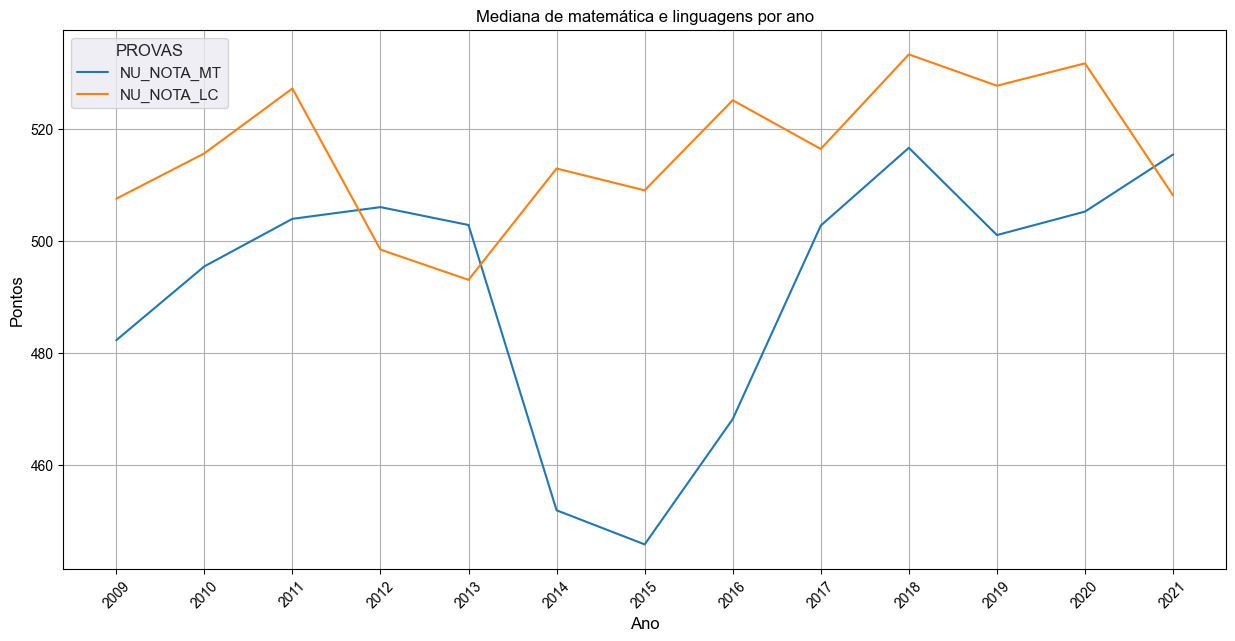

In [63]:
# mediana de matemática e linguagens por ano
fig, ax = plt.subplots(figsize=(15,7))

sns.set()
enem_df.groupby(['NU_ANO'])[['NU_NOTA_MT', 'NU_NOTA_LC']].median().plot(ax=ax)
plt.xticks(np.arange(2009, 2022), rotation=45)
plt.legend(title = 'PROVAS')
ax.set_xlabel('Ano', size=12)
ax.set_ylabel('Pontos', size=12)
ax.set_title('Mediana de matemática e linguagens por ano')
plt.show()

### Por sexo

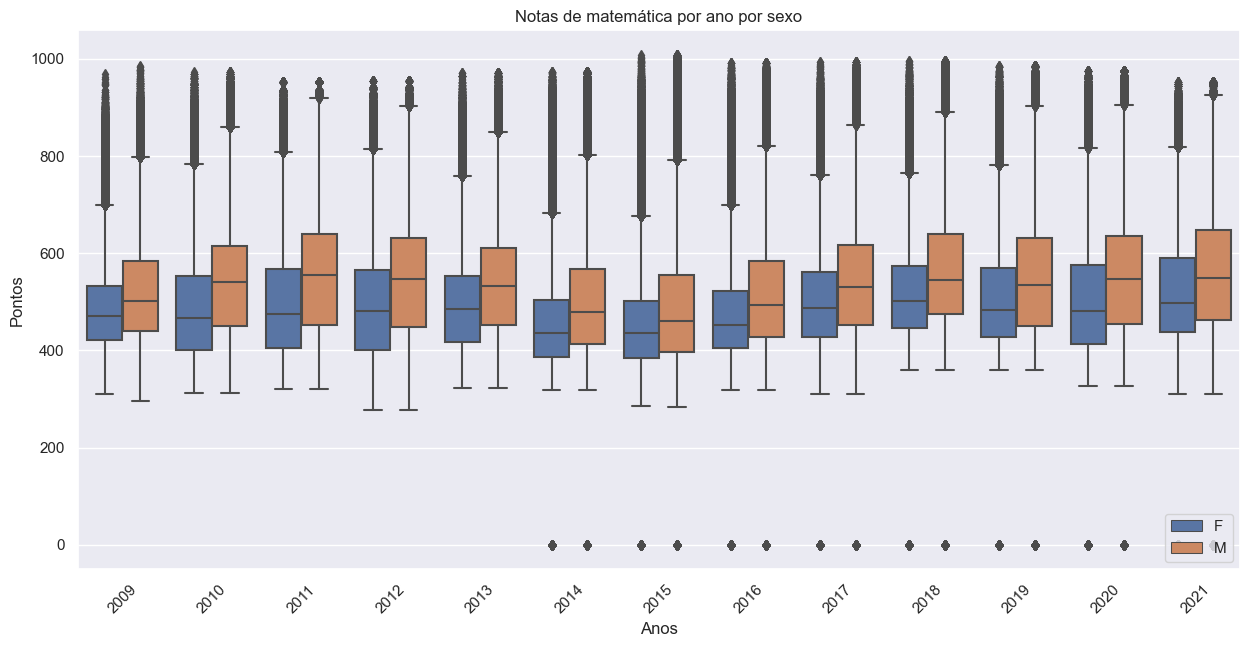

In [64]:
# notas de matemática por sexo
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x='NU_ANO', y='NU_NOTA_MT', hue='TP_SEXO', data=enem_df)
plt.title('Notas de matemática por ano por sexo')
plt.xticks(rotation=45)
plt.xlabel("Anos", size=12)
plt.ylabel("Pontos", size=12)
plt.legend(loc='lower right')
plt.show()

### Por etnia

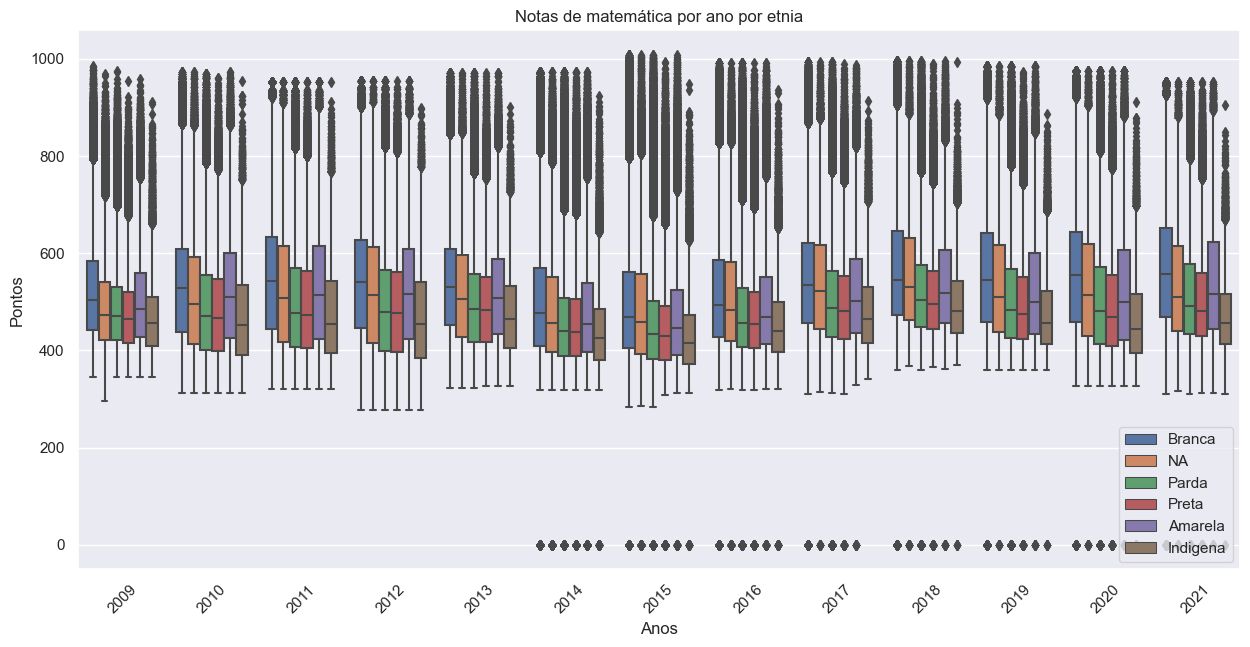

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x='NU_ANO', y='NU_NOTA_MT', hue='TP_COR_RACA', data=enem_df)
plt.title('Notas de matemática por ano por etnia')
plt.xticks(rotation=45)
plt.xlabel("Anos", size=12)
plt.ylabel("Pontos", size=12)
plt.legend(loc='lower right')
plt.show()

### Por faixa etária

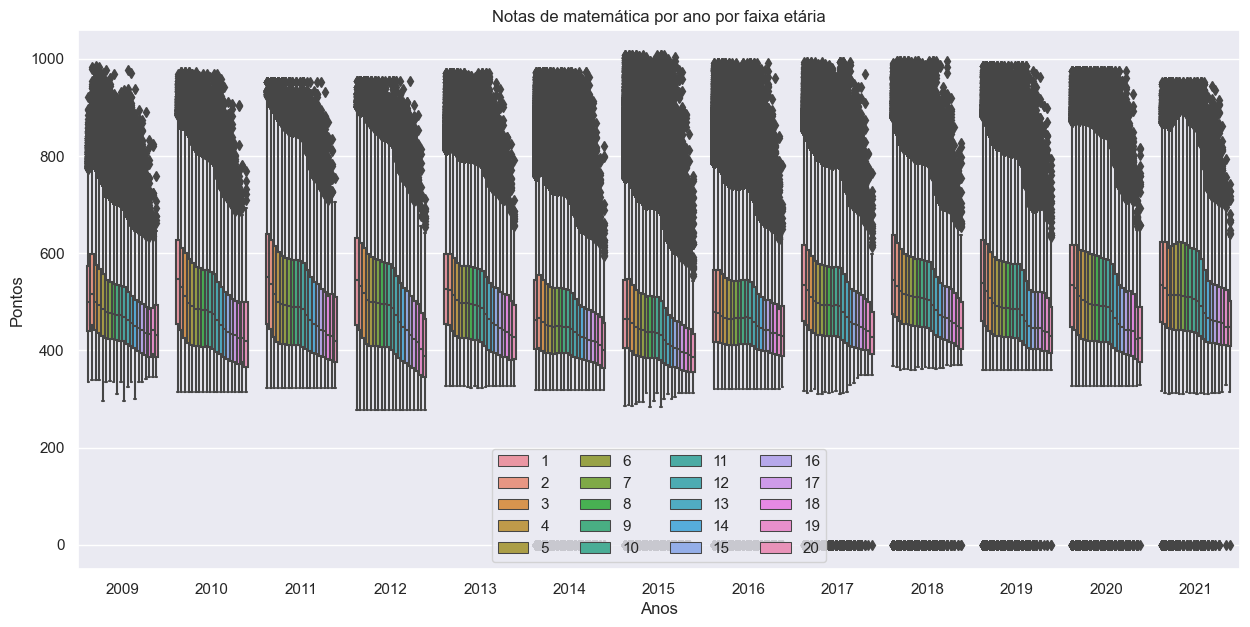

In [66]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x='NU_ANO', y='NU_NOTA_MT', hue='TP_FAIXA_ETARIA', data=enem_df)
plt.title('Notas de matemática por ano por faixa etária')
plt.xlabel("Anos", size=12)
plt.ylabel("Pontos", size=12)
plt.legend(ncol=4, loc='lower center')
plt.show()

# Médias de matemática e linguagens

### Por ano

In [67]:
# médias de mátematia e linguagem por sexo
enem_df.groupby(['NU_ANO'])[['NU_NOTA_MT', 'NU_NOTA_LC']].mean()

,NU_NOTA_MT,NU_NOTA_LC
NU_ANO,,
2009,498.561226,507.090227
2010,505.238030,510.049384
2011,517.366991,521.060103
2012,512.084787,496.381281
2013,510.514358,490.131649
2014,473.300625,507.819301
2015,468.088781,505.578629
2016,490.233025,521.042458
2017,518.831999,512.150346


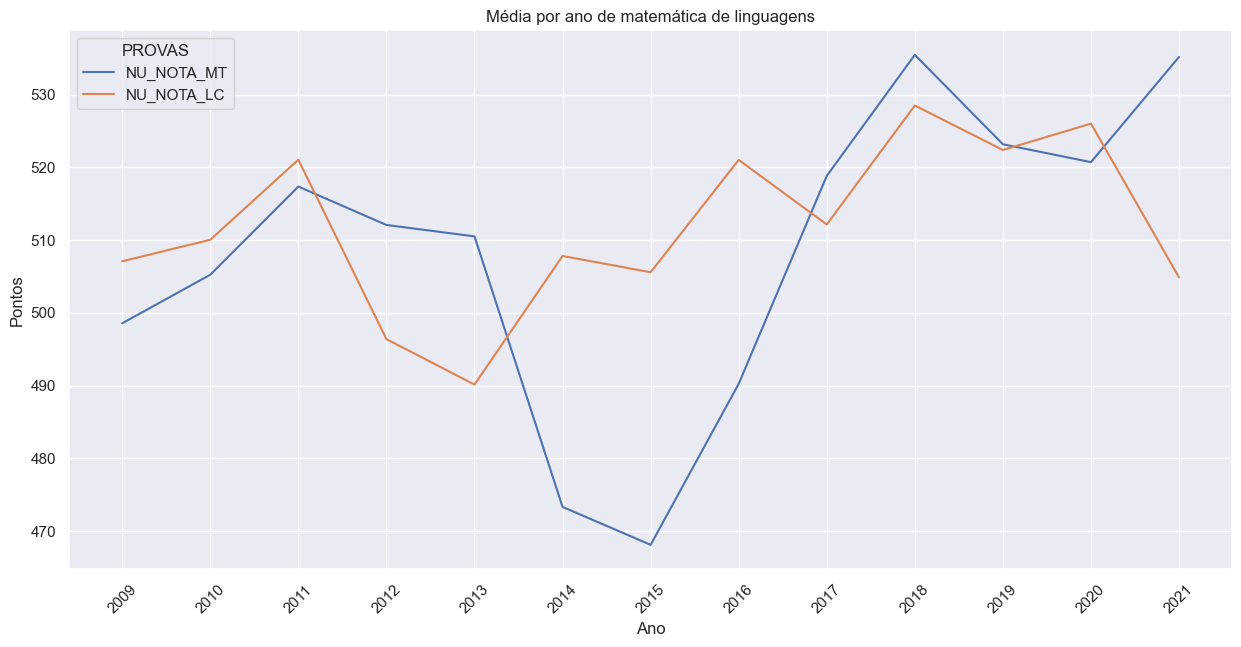

In [68]:
# média por ano de matemática e linguagens
fig, ax = plt.subplots(figsize=(15,7))

sns.set()
enem_df.groupby(['NU_ANO'])[['NU_NOTA_MT', 'NU_NOTA_LC']].mean().plot(ax=ax)
plt.xticks(np.arange(2009, 2022), rotation=45)
plt.legend(title = 'PROVAS')
ax.set_xlabel('Ano', size=12)
ax.set_ylabel('Pontos', size=12)
ax.set_title('Média por ano de matemática de linguagens')
plt.show()

### Por sexo

In [69]:
# média de mátematia por sexo
enem_df.groupby(['NU_ANO', 'TP_SEXO'])['NU_NOTA_MT'].mean()

NU_ANO  TP_SEXO
2009    F          484.349723
        M          520.276474
2010    F          482.597186
        M          538.749955
2011    F          493.126406
        M          552.788731
2012    F          490.005791
        M          543.502942
2013    F          492.359234
        M          535.866690
2014    F          454.949915
        M          498.557470
2015    F          454.471312
        M          486.657826
2016    F          473.115039
        M          513.845244
2017    F          502.367664
        M          542.070307
2018    F          518.344577
        M          560.273576
2019    F          506.216612
        M          548.072589
2020    F          500.825648
        M          551.106263
2021    F          519.903830
        M          559.882396
Name: NU_NOTA_MT, dtype: float64

In [70]:
# média de mátematia por sexo (pivot table)
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_SEXO', 
    aggfunc='mean'
    )

TP_SEXO,F,M
NU_ANO,,
2009,484.349723,520.276474
2010,482.597186,538.749955
2011,493.126406,552.788731
2012,490.005791,543.502942
2013,492.359234,535.866690
2014,454.949915,498.557470
2015,454.471312,486.657826
2016,473.115039,513.845244
2017,502.367664,542.070307


In [71]:
# média de linguagens por sexo (pivot table)
enem_df.pivot_table(
    'NU_NOTA_LC', 
    index='NU_ANO', 
    columns='TP_SEXO', 
    aggfunc='mean'
    )

TP_SEXO,F,M
NU_ANO,,
2009,506.787928,507.584974
2010,507.899515,513.231521
2011,520.665517,521.636694
2012,495.018868,498.319979
2013,489.126929,491.534669
2014,507.121920,508.779135
2015,506.374916,504.492798
2016,520.106939,522.332896
2017,511.145058,513.569242


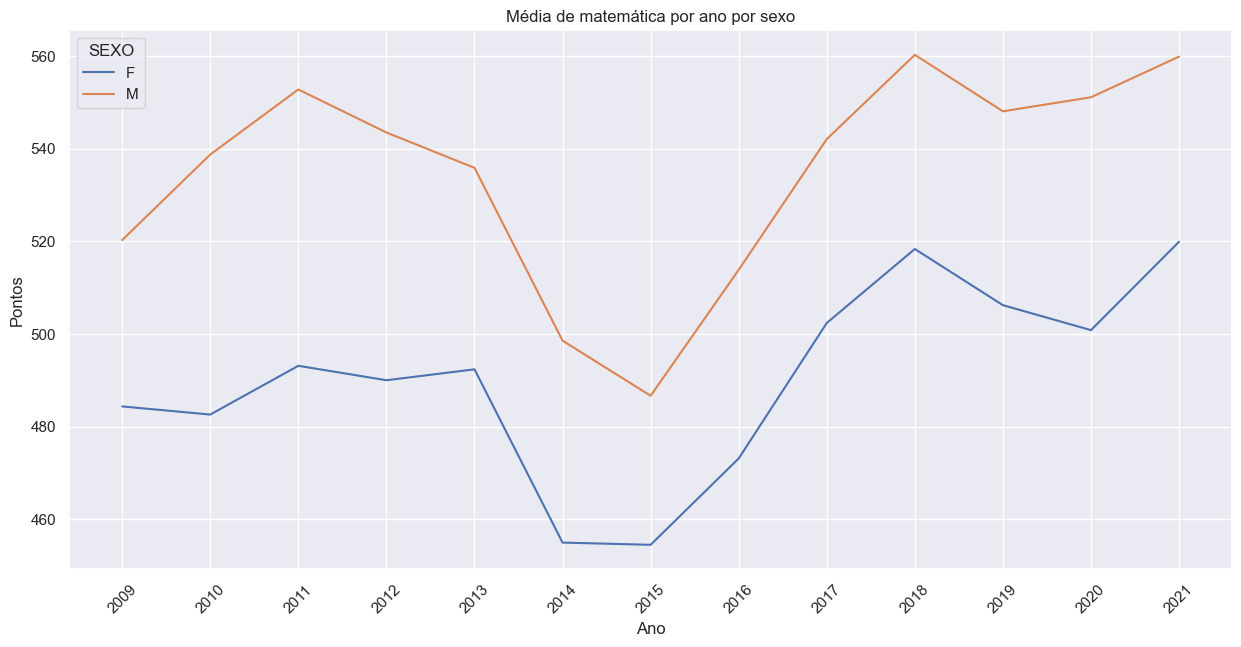

In [72]:
# gerando o gráfico da média matemática por sexo
fig, ax = plt.subplots(figsize=(15,7))

sns.set()
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_SEXO', 
    aggfunc='mean'
    ).plot(ax=ax)

plt.xticks(np.arange(2009, 2022), rotation=45)
plt.legend(title = 'SEXO')
ax.set_xlabel('Ano', size=12)
ax.set_ylabel('Pontos', size=12)
ax.set_title('Média de matemática por ano por sexo')
plt.show()

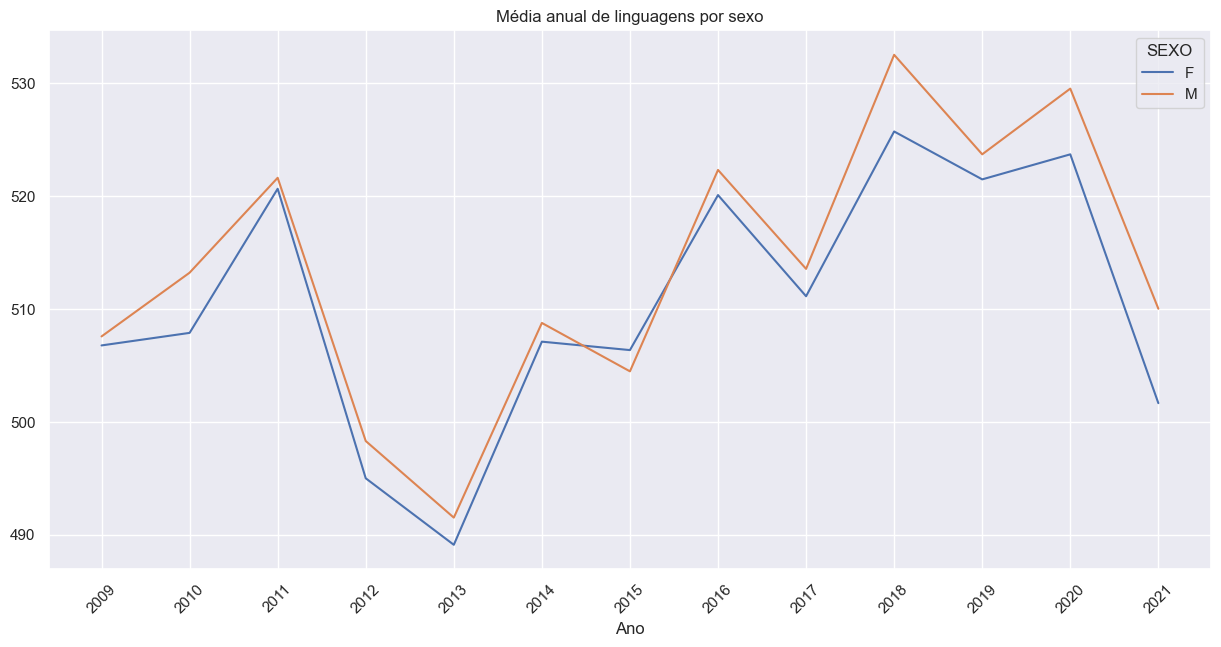

In [73]:
# gerando o gráfico da média anual de linguagens por sexo
fig, ax = plt.subplots(figsize=(15,7))

sns.set()
enem_df.pivot_table(
    'NU_NOTA_LC', 
    index='NU_ANO', 
    columns='TP_SEXO', 
    aggfunc='mean'
    ).plot(ax=ax)

plt.xticks(np.arange(2009, 2022), rotation=45)
plt.legend(title = 'SEXO')
ax.set_xlabel('Ano')
ax.set_title('Média anual de linguagens por sexo')
plt.show()

### Por faixa etária

In [74]:
# média de mátematia por faixa etária
enem_df.groupby(['NU_ANO', 'TP_FAIXA_ETARIA'])['NU_NOTA_MT'].mean()

NU_ANO  TP_FAIXA_ETARIA
2009    1                  514.989534
        2                  531.101569
        3                  518.086997
        4                  511.579789
        5                  503.765481
                              ...    
2021    16                 484.141272
        17                 481.730032
        18                 479.571931
        19                 473.048925
        20                 462.880645
Name: NU_NOTA_MT, Length: 260, dtype: float64

In [75]:
# média de mátematia por faixa etária (pivot table)
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='mean'
    )

TP_FAIXA_ETARIA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NU_ANO,,,,,,,,,,,,,,,,,,,,
2009,514.989534,531.101569,518.086997,511.579789,503.765481,495.390571,490.751016,488.002459,485.996993,484.200909,480.976292,472.584224,466.596036,461.404513,456.746002,453.479296,449.074776,446.597568,450.666863,449.348458
2010,545.427457,532.705479,520.900846,509.620660,501.728810,495.869004,493.837446,491.630263,490.707717,488.150445,484.173372,472.906469,464.676794,458.742008,453.504301,449.421071,446.016033,443.099349,441.933694,444.734000
2011,551.411876,542.178714,528.693935,517.439033,511.936968,508.517682,505.995911,504.727601,504.310233,503.185128,499.162785,489.045421,479.902980,473.632091,470.963296,464.528683,461.493588,455.348766,454.934519,446.425085
2012,543.959698,535.392089,524.224376,513.023347,507.260292,504.931638,502.733809,499.671940,498.603618,497.067442,491.073465,478.470083,466.422866,458.629645,453.787822,445.927575,438.377974,432.887679,420.659452,415.300000
2013,528.229485,528.983531,520.692323,512.086781,506.592837,505.229094,505.339250,503.907063,501.341051,499.492902,495.596564,485.592014,476.191454,470.826679,468.095475,463.739713,460.417794,457.972611,450.800705,443.664390
2014,481.535392,488.565580,482.272473,475.777763,472.400004,470.106625,469.893137,470.231623,468.874403,467.398218,463.132428,454.384855,446.214728,442.154990,440.480653,437.946209,434.545377,432.102303,426.853806,416.093208
2015,484.545439,487.142078,479.570620,471.258382,466.122782,462.865287,459.598897,459.289616,458.940479,457.650080,452.752298,442.317464,431.816854,426.413750,423.346803,421.765190,416.624470,412.543698,408.440612,405.435094
2016,498.658753,500.594216,495.885371,490.713139,487.793724,486.528798,486.270254,486.099685,486.738195,487.719026,484.935378,477.154926,468.008388,462.346518,458.892249,459.218026,454.482649,452.326094,446.785779,441.603282
2017,543.111997,536.241242,526.304950,519.254991,514.578901,511.696075,509.679503,508.534720,507.119148,508.176918,506.340255,496.792281,486.107545,476.990718,474.237787,472.386497,468.407264,464.544413,460.565423,446.321136


In [76]:
# média de linguagens por faixa etária (pivot table)
enem_df.pivot_table(
    'NU_NOTA_LC', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='mean'
    )

TP_FAIXA_ETARIA,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NU_ANO,,,,,,,,,,,,,,,,,,,,
2009,510.465425,530.936959,520.577813,515.716167,509.031688,502.178868,500.267691,499.675797,499.776621,499.884030,498.605113,491.577011,486.306828,481.391704,476.217455,466.379147,457.947561,448.178676,447.686275,433.876211
2010,533.544492,527.201234,519.500374,512.294466,507.594115,504.341255,504.168518,503.474549,503.283404,502.231376,498.919552,490.341791,483.907390,478.222974,472.623273,462.892976,453.267398,447.795401,441.963833,439.926000
2011,536.757646,533.126034,525.729414,519.451125,516.463452,515.649975,515.533333,515.758182,516.239714,516.570466,514.583180,508.886563,505.249233,502.064094,501.243899,494.282759,486.788191,479.921241,475.055995,464.399661
2012,504.405749,504.014047,499.646178,495.354051,493.473191,493.360988,493.553596,493.365865,493.928461,493.653020,492.535207,486.972787,482.504672,481.083692,481.166317,476.770971,467.979310,463.243732,453.892829,445.178161
2013,496.844199,499.082391,492.845133,487.373727,485.074222,485.604173,487.473686,488.103010,488.093241,488.327825,487.827854,482.833487,478.292182,476.882435,476.491790,473.260932,465.474869,458.549172,452.056261,437.234634
2014,511.408565,516.971271,511.582328,506.135622,504.333518,504.645893,505.962966,507.485423,508.095407,507.943407,506.738254,500.325139,493.544634,490.666808,490.348335,488.022519,479.697043,472.241618,466.615551,449.734151
2015,510.535073,513.202312,508.469278,503.978069,501.525614,501.864117,502.431330,503.944332,505.394972,505.581813,505.300921,500.310597,493.080547,490.107469,488.603589,487.937408,480.388063,472.731642,468.840125,448.530755
2016,526.995289,528.308113,524.005096,519.540406,517.495127,516.508029,516.472263,516.909634,518.178336,519.566148,519.349732,515.585249,509.651516,507.734818,507.506353,508.703127,503.678212,498.931008,496.532127,484.933398
2017,520.568710,518.216210,512.281097,509.500229,508.201737,508.204709,508.711993,509.949973,510.475741,511.861037,513.604256,510.142134,503.842321,500.384329,498.862398,499.014129,493.934472,483.876474,482.551907,463.937500


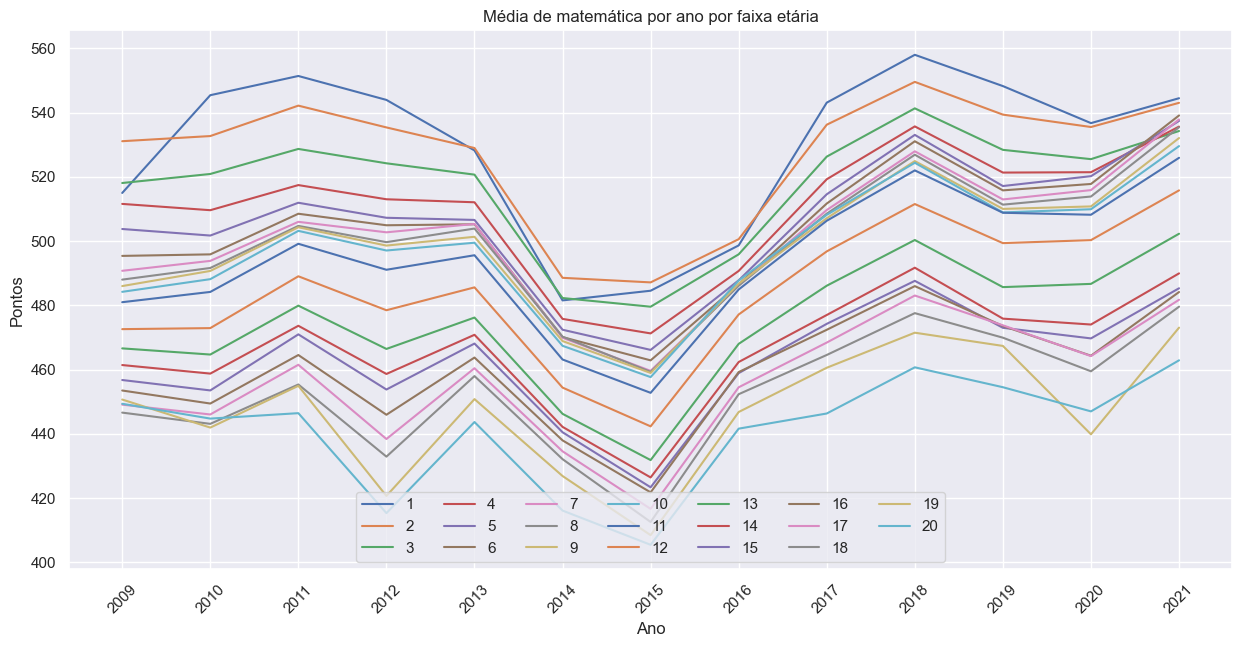

In [77]:
# gerando o gráfico da média anual de matemática por faixa etária
fig, ax = plt.subplots(figsize=(15,7))

sns.set()
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='mean'
    ).plot(ax=ax)

plt.xticks(np.arange(2009, 2022), rotation=45)
plt.legend(title = 'FAIXA ETÁRIA')
ax.set_xlabel('Ano', size=12)
ax.set_ylabel('Pontos', size=12)
ax.set_title('Média de matemática por ano por faixa etária')
plt.legend(ncol=7, loc='lower center')
plt.show()

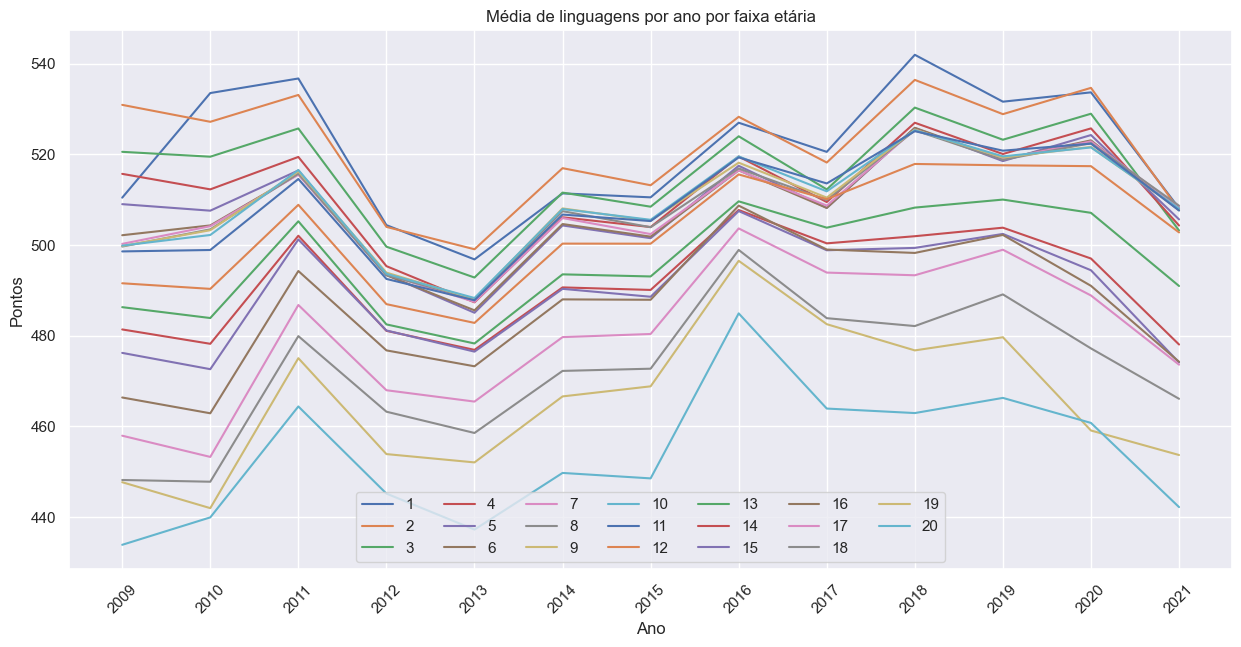

In [78]:
# gerando o gráfico de linguagens por faixa etária
fig, ax = plt.subplots(figsize=(15,7))

sns.set()
enem_df.pivot_table(
    'NU_NOTA_LC', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='mean'
    ).plot(ax=ax)

plt.xticks(np.arange(2009, 2022), rotation=45)
plt.legend(title = 'FAIXA ETÁRIA')
ax.set_xlabel('Ano', size=12)
ax.set_ylabel('Pontos', size=12)
ax.set_title('Média de linguagens por ano por faixa etária')
plt.legend(ncol=7, loc='lower center')
plt.show()

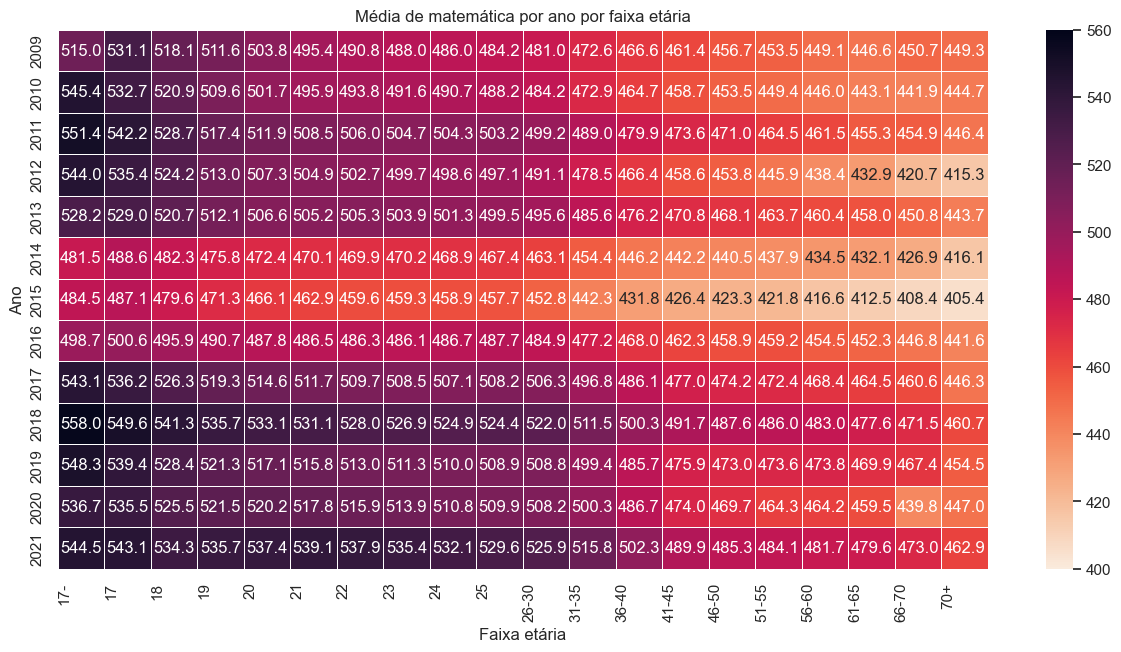

In [79]:
# média de matemática por faixa etária (heart map)
data= pd.pivot_table(
    enem_df, 
    values='NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='mean'
    )

f, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(
                data, 
                cmap="rocket_r", 
                annot=True, 
                fmt=".1f", 
                linewidths=.5, 
                ax=ax, 
                vmin=400, 
                vmax=560)

plt.xticks(
    np.arange(0,20,1), 
    [
        '17-', 
        '17', 
        '18', 
        '19', 
        '20', 
        '21', 
        '22', 
        '23',
        '24', 
        '25', 
        '26-30', 
        '31-35', 
        '36-40', 
        '41-45', 
        '46-50', 
        '51-55', 
        '56-60', 
        '61-65', 
        '66-70', 
        '70+'
    ], rotation=90, ha='left')

plt.xticks(rotation=90)
plt.xlabel("Faixa etária", size=12)
plt.ylabel("Ano", size=12)
ax.set_title('Média de matemática por ano por faixa etária');

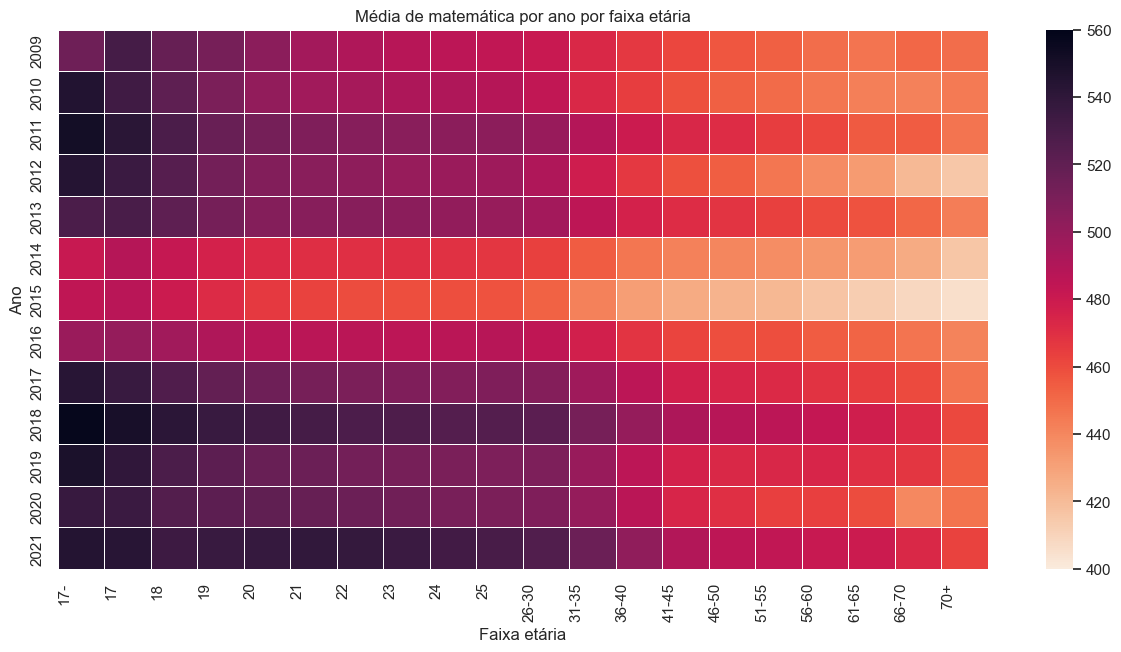

In [80]:
# média de matemática por faixa etária (heart map)
data= pd.pivot_table(
    enem_df, 
    values='NU_NOTA_MT', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='mean'
    )

f, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(
    data, 
    cmap="rocket_r", 
    annot=False, 
    fmt=".1f", 
    linewidths=.5, 
    ax=ax, 
    vmin=400, 
    vmax=560
    )

plt.xticks(
    np.arange(0,20,1), 
    [
        '17-', 
        '17', 
        '18', 
        '19', 
        '20', 
        '21', 
        '22', 
        '23',
        '24', 
        '25', 
        '26-30', 
        '31-35', 
        '36-40', 
        '41-45', 
        '46-50', 
        '51-55', 
        '56-60', 
        '61-65', 
        '66-70', 
        '70+'
    ], rotation=90, ha='left')

plt.xlabel("Faixa etária", size=12)
plt.ylabel("Ano", size=12)
ax.set_title('Média de matemática por ano por faixa etária');

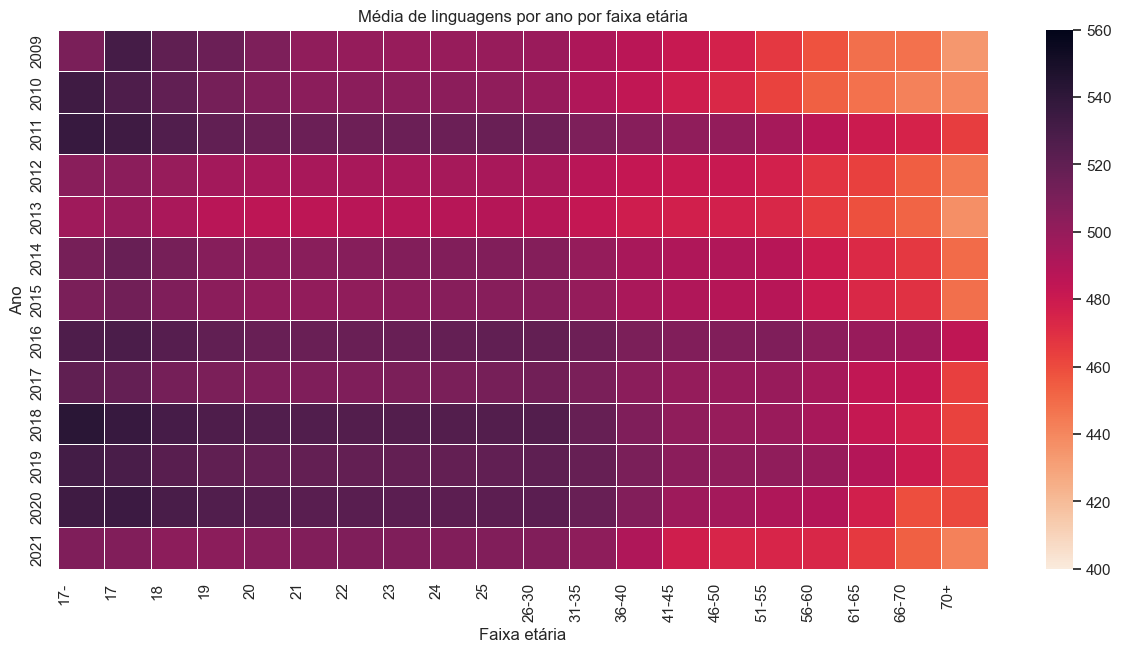

In [81]:
# média de linguagens por faixa etária (heart map)
data= pd.pivot_table(
    enem_df, 
    values='NU_NOTA_LC', 
    index='NU_ANO', 
    columns='TP_FAIXA_ETARIA', 
    aggfunc='mean'
    )

f, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(
    data, 
    cmap="rocket_r", 
    annot=False, 
    fmt=".1f", 
    linewidths=.5, 
    ax=ax, 
    vmin=400, 
    vmax=560
    )

plt.xticks(
    np.arange(0,20,1), 
    [
        '17-', 
        '17', 
        '18', 
        '19', 
        '20', 
        '21', 
        '22', 
        '23',
        '24', 
        '25', 
        '26-30', 
        '31-35', 
        '36-40', 
        '41-45', 
        '46-50', 
        '51-55', 
        '56-60', 
        '61-65', 
        '66-70', 
        '70+'
    ], rotation=90, ha='left')

plt.xlabel("Faixa etária", size=12)
plt.ylabel("Ano", size=12)
ax.set_title('Média de linguagens por ano por faixa etária');

### Por região

In [82]:
# média de matemática por estado (pivot table)
enem_df.pivot_table(
    'NU_NOTA_MT', 
    index='NU_ANO', 
    columns='SG_UF_ESC', 
    aggfunc='mean'
    )

SG_UF_ESC,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
NU_ANO,,,,,,,,,,,,,,,,,,,,,
2009,453.286042,472.173458,464.197598,463.216884,478.488137,475.068900,508.980149,501.994792,494.008738,468.197483,...,508.585490,523.521780,481.848700,476.002943,464.236873,506.797657,514.734894,462.230488,521.288922,464.420065
2010,451.323031,473.550320,447.768580,463.374348,470.038030,479.475949,526.089694,497.223357,503.429166,453.104113,...,520.242740,533.987636,484.818656,473.777939,459.769205,523.896996,525.855398,463.641338,527.289939,464.092233
2011,463.179420,486.418006,461.205223,463.480202,486.927382,489.567402,540.765810,529.152253,517.252421,461.479551,...,531.009575,553.436003,502.250669,495.653458,483.286142,544.158824,555.157307,484.313719,538.008711,473.208724
2012,442.567631,485.016274,448.223180,449.617203,492.026530,477.155551,536.639561,514.147288,503.055641,458.238572,...,525.924071,542.474792,491.920451,476.430815,469.726202,534.900120,535.834610,483.564095,535.607261,466.654880
2013,463.416637,487.187347,463.379505,458.535120,490.500074,485.670219,533.507236,516.904512,507.866072,472.433011,...,524.492958,534.881769,493.877412,488.138201,475.721893,530.745452,528.774834,491.281000,532.551579,475.894058
2014,433.665940,454.159169,436.561168,431.571812,458.445130,453.991862,451.393945,484.022530,471.641028,437.708846,...,488.602234,496.700252,464.396323,452.243065,445.616122,487.476889,495.893439,464.844852,497.568848,446.522484
2015,431.605809,444.973622,430.351768,430.618160,452.633448,453.156079,487.390221,480.017669,469.120833,437.454399,...,487.825592,491.942610,462.022020,446.543650,438.984157,481.392116,484.780756,465.767556,488.192355,444.136088
2016,449.722651,467.879561,455.225172,450.362683,472.558964,470.195285,509.438631,495.904846,488.268690,451.391792,...,501.530330,510.498161,484.507850,472.542664,464.269980,503.120515,507.079613,481.721535,505.631134,462.051488
2017,479.769685,491.827133,481.549754,475.747398,496.612922,500.877149,532.793222,528.413058,517.078367,477.458639,...,527.568830,537.843453,513.188896,493.612814,493.306829,534.660716,548.028249,506.841865,534.509777,490.693572


In [83]:
# média de linguagens por estado (pivot table)
enem_df.pivot_table(
    'NU_NOTA_LC', 
    index='NU_ANO', 
    columns='SG_UF_ESC', 
    aggfunc='mean'
    )

SG_UF_ESC,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
NU_ANO,,,,,,,,,,,,,,,,,,,,,
2009,450.352549,462.620066,447.426094,466.424188,479.289632,468.180876,529.828302,489.106172,495.227188,463.483045,...,505.896759,532.029173,476.551459,472.809505,455.382770,506.022553,508.869524,461.579409,522.573963,459.206702
2010,475.129805,480.005925,462.910690,483.987339,481.044086,483.579933,533.395794,491.739389,508.372209,465.648230,...,515.793199,531.485367,490.132160,481.944492,473.072789,519.138198,516.831314,477.515877,525.742976,476.732925
2011,488.807504,500.076897,482.722542,495.351403,501.091920,497.636566,543.813956,515.035923,516.852161,485.038121,...,523.376763,542.807769,509.935834,504.282944,499.034419,531.967659,532.021199,499.666766,532.739890,487.171144
2012,456.516243,472.210970,456.321181,463.540141,483.808673,470.185509,514.433529,485.554040,487.850093,462.478308,...,499.397115,509.219547,479.608574,470.280279,468.668564,500.195186,497.296512,473.462270,508.885309,467.315425
2013,456.781176,466.308116,452.026724,456.546441,474.425244,464.646375,513.754190,482.082464,483.444864,459.960766,...,494.036210,507.322834,476.061001,468.602780,466.404317,500.735590,494.665960,470.313211,506.389356,455.546319
2014,478.980878,490.006463,479.262335,481.598754,496.814571,487.741716,488.583672,506.208084,506.212854,479.854551,...,516.366261,525.089527,498.754257,488.728303,486.212776,520.040025,517.484445,496.341533,526.914207,483.817575
2015,474.149055,478.824666,475.393002,477.422946,488.903468,477.673774,522.011285,498.915586,500.136251,473.343966,...,517.509493,519.464156,492.041825,483.184542,483.303268,515.650985,511.944579,490.828484,520.176851,473.916383
2016,497.974710,500.531263,497.768348,492.679640,507.316739,500.948527,538.558123,517.008663,518.709932,489.246647,...,526.165231,537.515855,514.884387,505.588828,502.278179,529.009592,528.142386,508.699159,537.544948,496.753642
2017,477.525227,484.033270,480.994363,479.250319,492.278691,485.172722,525.589796,506.950513,505.348728,474.564676,...,517.084294,520.475461,499.857261,487.353915,490.579596,521.112928,523.348348,495.480801,522.408873,481.651772


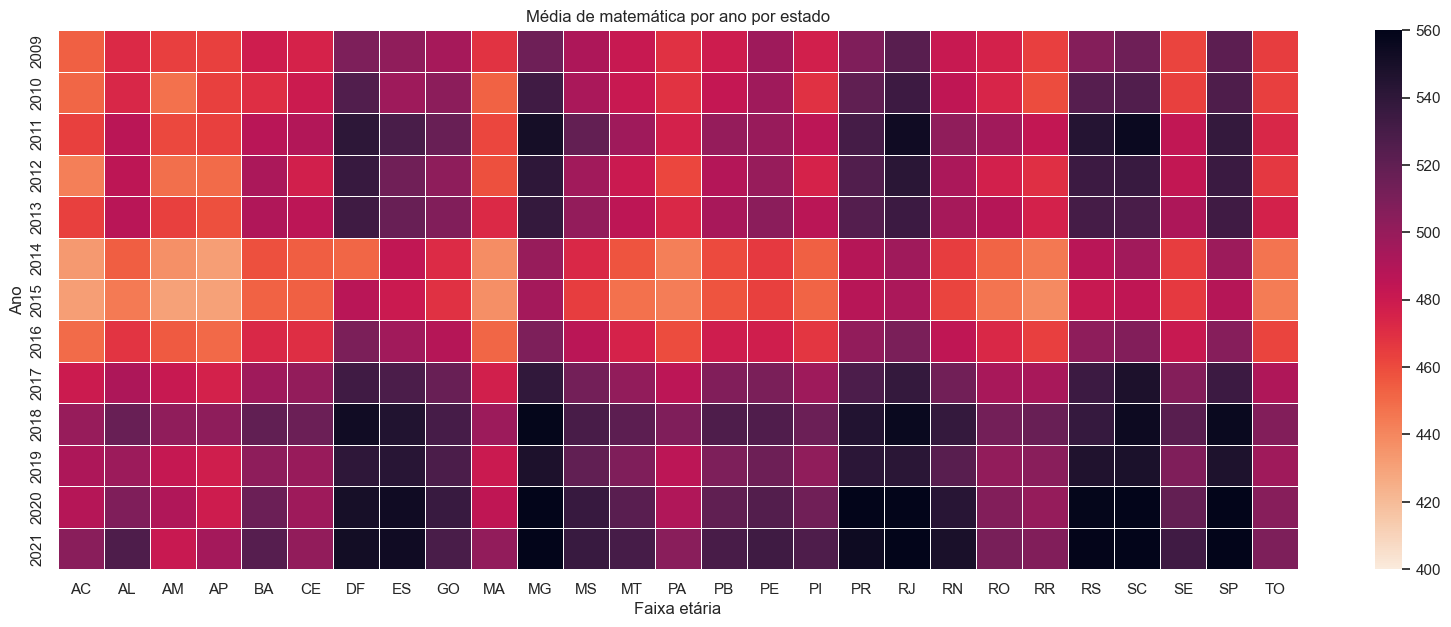

In [84]:
# média de matemática por estado (heart map)
data= pd.pivot_table(
    enem_df, 
    values='NU_NOTA_MT', 
    index='NU_ANO', 
    columns='SG_UF_ESC', 
    aggfunc='mean'
    )

f, ax = plt.subplots(figsize=(20, 7))

sns.heatmap(
    data, 
    cmap="rocket_r", 
    annot=False, 
    fmt=".1f", 
    linewidths=.5, 
    ax=ax, 
    vmin=400, 
    vmax=560
    )

plt.xlabel("Faixa etária", size=12)
plt.ylabel("Ano", size=12)
ax.set_title('Média de matemática por ano por estado');

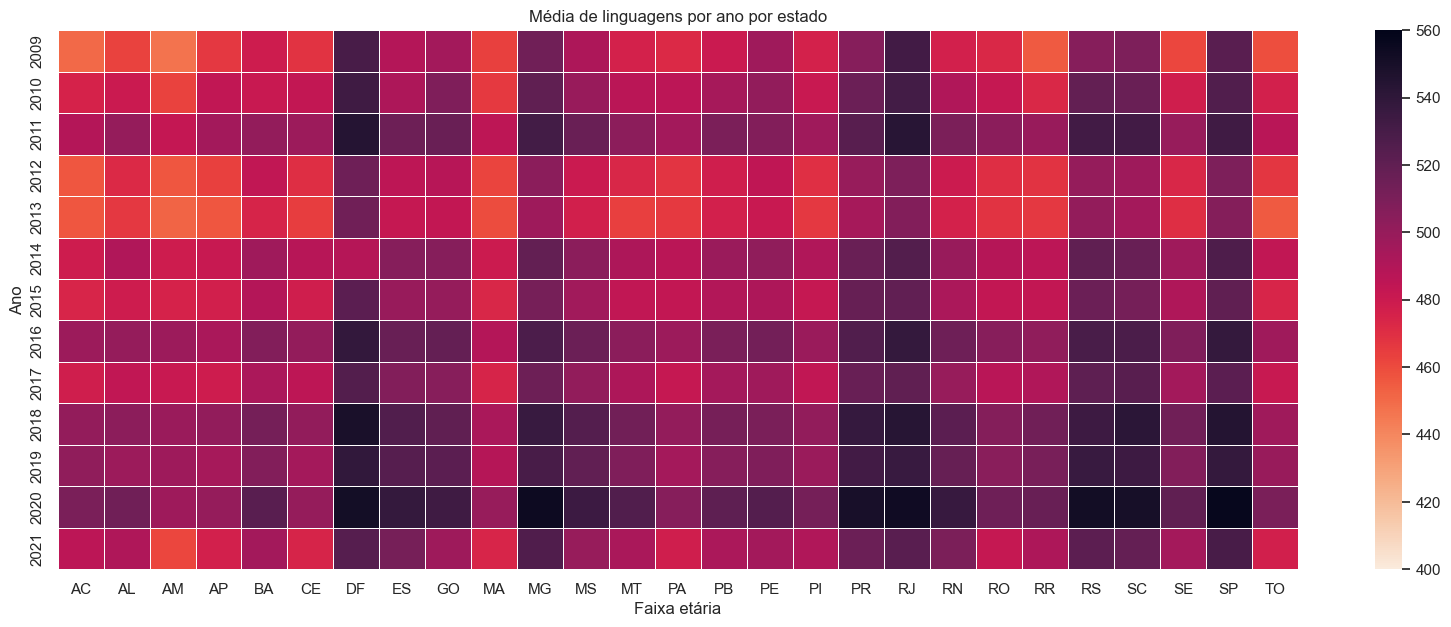

In [85]:
# média de linguagens por estado (heart map)
data= pd.pivot_table(
    enem_df, 
    values='NU_NOTA_LC', 
    index='NU_ANO', 
    columns='SG_UF_ESC', 
    aggfunc='mean'
    )

f, ax = plt.subplots(figsize=(20, 7))

sns.heatmap(
    data, 
    cmap="rocket_r", 
    annot=False, 
    fmt=".1f", 
    linewidths=.5, 
    ax=ax, 
    vmin=400, 
    vmax=560
    )

plt.xlabel("Faixa etária", size=12)
plt.ylabel("Ano", size=12)
ax.set_title('Média de linguagens por ano por estado');